In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load the rainfall data
data = pd.read_csv('Data1_Columbia.csv')

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Rainfall'].values.reshape(-1, 1))

In [5]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [6]:
# Define a function to create the dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:i+look_back, 0])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

In [7]:
# Create the dataset
look_back = 10  # number of previous time steps to use for prediction
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [8]:

# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Train the model
model.fit(train_X, train_Y, epochs=10, batch_size=1, verbose=2)


Epoch 1/10


In [ ]:
# Make predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

97/97 [==============================] - 0s 3ms/step


In [ ]:
# Inverse scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
train_Y = scaler.inverse_transform([train_Y])
test_Y = scaler.inverse_transform([test_Y])

In [ ]:
# Calculate MSE and RMSE
train_mse = mean_squared_error(train_Y[0], train_predictions[:, 0])
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(test_Y[0], test_predictions[:, 0])
test_rmse = np.sqrt(test_mse)

In [ ]:
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)

Train MSE: 35.018392824037775
Train RMSE: 5.917634056279399
Test MSE: 724.7917543204671
Test RMSE: 26.921956732757504


In [ ]:
# Set the threshold value
threshold = 0.5

In [ ]:
# Calculate prediction percentage
train_percentage = np.sum(train_predictions > threshold) / len(train_predictions) * 100
test_percentage = np.sum(test_predictions > threshold) / len(test_predictions) * 100

In [ ]:
print("Train Prediction Percentage:", train_percentage)
print("Test Prediction Percentage:", test_percentage)


Train Prediction Percentage: 84.81947261663286
Test Prediction Percentage: 83.79960962914768


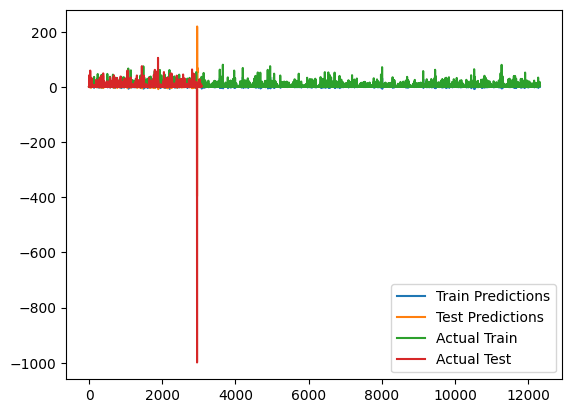

In [ ]:
# Plot the predicted values and actual values
plt.plot(train_predictions[:, 0], label='Train Predictions')
plt.plot(test_predictions[:, 0], label='Test Predictions')
plt.legend()
plt.show()